## Tercera parte pandas 
- Operaciones con fechas
- Combinar dataframes
- Reacomodar datos 

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cargar nuestra base de datos de elencos
elenco = pd.read_csv('data/cast.csv', encoding='utf-8')
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
# Ahora tambien cargaremos datos de otra base de datos
# 
fecha_lanz = pd.read_csv('data/release_dates.csv', encoding='utf-8')
fecha_lanz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [48]:
# Que tal si cargamos esta base de datos pero la columna date la convertirmos a un 
# formato datetime que tiene metodos para hacer operaciones sobre fechas.. Mejor!

fecha_lanz = pd.read_csv('data/release_dates.csv' , parse_dates=['date'], infer_datetime_format=True)
fecha_lanz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [56]:
# Podemos acceder a los metodos del namespace datetime, en pandas "dt"
fl = fecha_lanz 
fl.date.dt.year

0         2007
1         2015
2         2015
3         2015
4         2016
5         2015
6         2014
7         2016
8         2017
9         2016
10        2014
11        2014
12        2016
13        2014
14        2015
15        1971
16        1972
17        1972
18        1972
19        1972
20        1972
21        1972
22        1972
23        1972
24        1973
25        1973
26        1935
27        1939
28        1918
29        1926
          ... 
443526    2005
443527    2005
443528    2005
443529    2005
443530    2005
443531    2005
443532    2005
443533    2005
443534    2005
443535    2005
443536    2005
443537    2005
443538    2005
443539    2005
443540    2005
443541    2005
443542    2005
443543    2005
443544    2005
443545    2005
443546    2005
443547    2005
443548    2005
443549    2005
443550    2005
443551    2005
443552    2005
443553    2005
443554    2005
443555    2005
Name: date, dtype: int64

In [ ]:
# Con esto que podemos hacer un listado categorizando por algun elemento de la 
# fecha como por ejemplo:


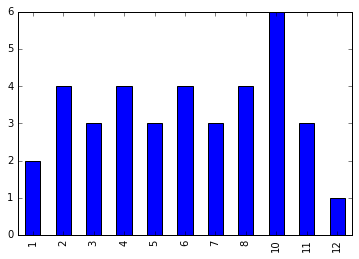

In [196]:
# En que meses se lanzan mas comunmente peliculas que contienen la palabra
# "horror"
fl = fecha_lanz 
fl = fl[(fl.title.str.contains('horror',case=False)) & (fl.country == 'USA')]
fl.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [95]:
# Exploremos la funcionalidad para unir dataframes con el metodo "merge"

In [100]:
e = elenco
e = e[e.name == "Denzel Washington"]
e.head()

,title,year,name,type,character,n
2288261,2 Guns,2013,Denzel Washington,actor,Bobby,1.0
2288262,A Soldier's Story,1984,Denzel Washington,actor,Private First Class Peterson,9.0
2288263,American Gangster,2007,Denzel Washington,actor,Frank Lucas,1.0
2288264,Antwone Fisher,2002,Denzel Washington,actor,Dr. Jerome Davenport,4.0
2288265,Carbon Copy,1981,Denzel Washington,actor,Roger Porter,5.0


In [101]:
# Nos interesa conocer la fecha de lanzamiento de las peliculas en la que ah participado 
# Denzel Washington.. Pero esa información esta en otro dataframe!!

In [102]:
fl = fecha_lanz
fl.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [109]:
# Es realmente sencillo con pandas y su poderoso comando "merge"
e = elenco
e = e[e.name == "Denzel Washington"]
e = e.merge(fecha_lanz)
e

,title,year,name,type,character,n,country,date
0,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Thailand,2013-08-01
1,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Canada,2013-08-02
2,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Turkey,2013-08-02
3,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,USA,2013-08-02
4,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Iceland,2013-08-08
5,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Bolivia,2013-08-09
6,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Bosnia and Herzegovina,2013-08-09
7,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Croatia,2013-08-09
8,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Ireland,2013-08-16
9,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Kenya,2013-08-16


In [108]:
# Pero como funciona? 
# Empata para ambas dimensiones --> keys e indices las coincidencias y 
# agrega las entradas que no estan disponibles en el primer dataframe

# Por default nos funciono, pero el comando es muy flexible.
# Mas información: http://pandas.pydata.org/pandas-docs/stable/merging.html

## Otro concepto: Pivot

In [151]:
# Pivot permite el reacomodo de los valores del dataframe, moviendo una columna como 
# indice, otra como llave de datos y otra para los valores

# Ejemplo fechas de lanzamiento de peliculas Harry Potter en Mexico, USA y Canada
fl = fecha_lanz 
fl = fl[fl.title.str.startswith("Harry Potter")]
fl = fl[(fl.country == "Mexico") | (fl.country == "USA") | (fl.country == "Canada")]
fl 

,title,year,country,date
138430,Harry Potter and the Chamber of Secrets,2002,Canada,2002-11-15
138434,Harry Potter and the Chamber of Secrets,2002,USA,2002-11-15
138452,Harry Potter and the Chamber of Secrets,2002,Mexico,2002-11-29
138499,Harry Potter and the Deathly Hallows: Part 1,2010,Mexico,2010-11-18
138511,Harry Potter and the Deathly Hallows: Part 1,2010,Canada,2010-11-19
138529,Harry Potter and the Deathly Hallows: Part 1,2010,USA,2010-11-19
138584,Harry Potter and the Deathly Hallows: Part 2,2011,Canada,2011-07-15
138592,Harry Potter and the Deathly Hallows: Part 2,2011,Mexico,2011-07-15
138600,Harry Potter and the Deathly Hallows: Part 2,2011,USA,2011-07-15
138616,Harry Potter and the Goblet of Fire,2005,Canada,2005-11-18


In [158]:
# Reacomodemos los datos, 
# : title como indice
# : country como columnas
# : date como valores
fl = fecha_lanz 
fl = fl[fl.title.str.startswith("Harry Potter")]
fl = fl[(fl.country == "Mexico") | (fl.country == "USA") | (fl.country == "Canada")]
fl = fl.pivot('title','country','date')
fl

# Extra
#fl.apply(lambda x : x.dt.month)

country,Canada,Mexico,USA
title,,,
Harry Potter and the Chamber of Secrets,2002-11-15,2002-11-29,2002-11-15
Harry Potter and the Deathly Hallows: Part 1,2010-11-19,2010-11-18,2010-11-19
Harry Potter and the Deathly Hallows: Part 2,2011-07-15,2011-07-15,2011-07-15
Harry Potter and the Goblet of Fire,2005-11-18,2005-11-18,2005-11-18
Harry Potter and the Half-Blood Prince,2009-07-15,2009-07-15,2009-07-15
Harry Potter and the Order of the Phoenix,2007-07-11,2007-07-12,2007-07-11
Harry Potter and the Prisoner of Azkaban,2004-06-04,2004-06-04,2004-06-04
Harry Potter and the Sorcerer's Stone,2001-11-16,2001-11-30,2001-11-16


## Ejercicios


In [197]:
# Del periodo 2010 al presente en cuantas peliculas ah participado
# la actriz ""

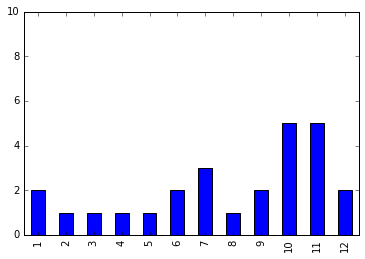

In [209]:
# En que fechas fue lanzada cada pelicula de "Salma Hayek"
# dentro de un periodo de 1990 al presente en Mexico
fl = fecha_lanz
fl = fl[fl.country == 'Mexico']

e = elenco
e = e[e.name == 'Salma Hayek']
e = e[(e.year > 1990)]

e = e.merge(fl)

# Una nueva nueva columna con los valores del mes
e['month'] = e.date.dt.month
# Graficado
e.month.value_counts().sort_index().plot(kind='bar',ylim=[0,10])

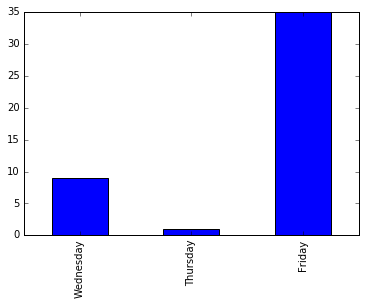

In [245]:
# En que dia de la semana se han lanzado en USA las peliculas de 
# donde aparece Tom Cuise.. Incluir un grafico 

fl = fecha_lanz
fl = fl[fl.country == 'USA']

e = elenco
e = e[ (e.name == 'Tom Cruise') ] 
wd = e.merge(fl).date.dt.dayofweek.value_counts().sort_index()
wd = wd.rename({4:'Friday', 3:'Thursday', 2:'Wednesday'})
wd.plot(kind='bar')

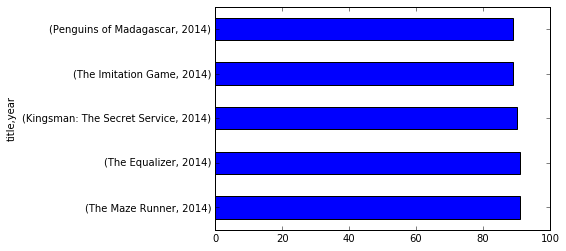

In [288]:
# Que peliculas han sido lanzadas en la mayor cantidad de 
# paises , incluir en un grafico las 5 mayores

fl = fecha_lanz

fl = fl.groupby(['title','year'])
fl.size().sort_values(ascending=False)[:5].plot(kind='barh')


In [315]:
# Quien tiende a ser el actor si clasificado (n > 1) que mas a 
# participado en peliculas donde el protagonista es
# Leonardo DiCaprio 

e = elenco
hf = e[(e.name == 'Leonardo DiCaprio') & (e.n == 1)]
er = e[(e.n > 1)]
mt = hf.merge(er,on=['title','year'])
mt.groupby(['name_x','name_y']).size().sort_values(ascending=False)

name_x             name_y              
Leonardo DiCaprio  Joseph P. Reidy         4
                   Nellie Sciutto          3
                   J.C. MacKenzie          3
                   Steve Witting           3
                   Lukas Haas              2
                   C?cile Auclert          2
                   Brigitte Boucher        2
                   Brigitte Auber          2
                   Leonor Varela           2
                   Hugh Laurie             2
                   Shay Duffin             2
                   Laura (II) Fraser       2
                   Sonia Backers           2
                   G?rard Depardieu        2
                   Billy (XI) Smith        2
                   Tess Gillis             2
                   Armen Garo              2
                   Thomas B. Duffy         2
                   Anne Parillaud          2
                   Karine Belly            2
                   Jean-Pol Brissart       2
               